In [99]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib.inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [100]:
def read_csv(data_path):
    data = pd.read_csv(data_path, delimiter=';', na_values='?')
    return pd.DataFrame(data)

In [101]:
data_train = read_csv('docs/data_arrhythmia.csv')

In [102]:
data_train.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [103]:
# cat_vars = ['age', 'sex', 'qrs_duration', 'heart_rate', 'diagnosis']
#
# for diagnosis in cat_vars:
#     print(diagnosis, data_train[diagnosis].unique())

In [104]:
# for diagnosis in cat_vars:
#     data = data_train.copy()
#     data[diagnosis] = data['heart_rate']
#     plt.scatter(data[diagnosis], data['qrs_duration'])
#     plt.xlabel(diagnosis)
#     plt.ylabel('qrs_duration')
#     plt.show()

In [111]:
numeric_features = data_train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs',
       ...
       'KY', 'KZ', 'LA', 'LB', 'LC', 'LD', 'LE', 'LF', 'LG', 'diagnosis'],
      dtype='object', length=280)

<Axes: >

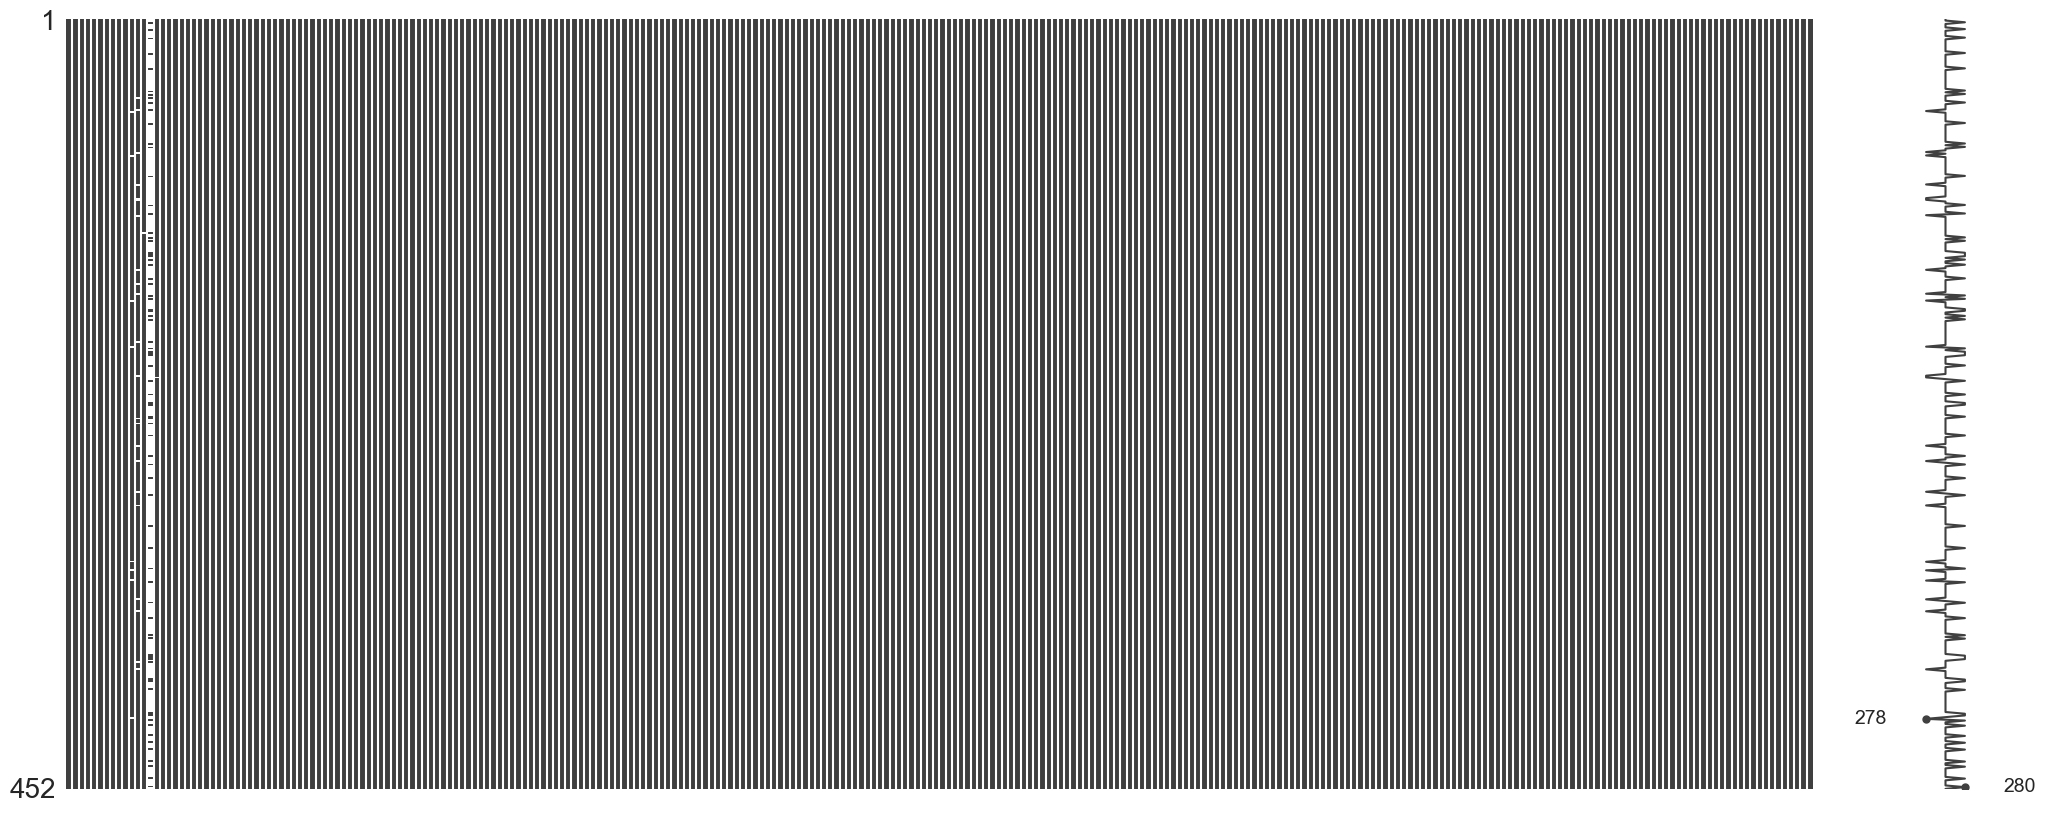

In [112]:
msno.matrix(data_train.sample(len(data_train)))

<Axes: >

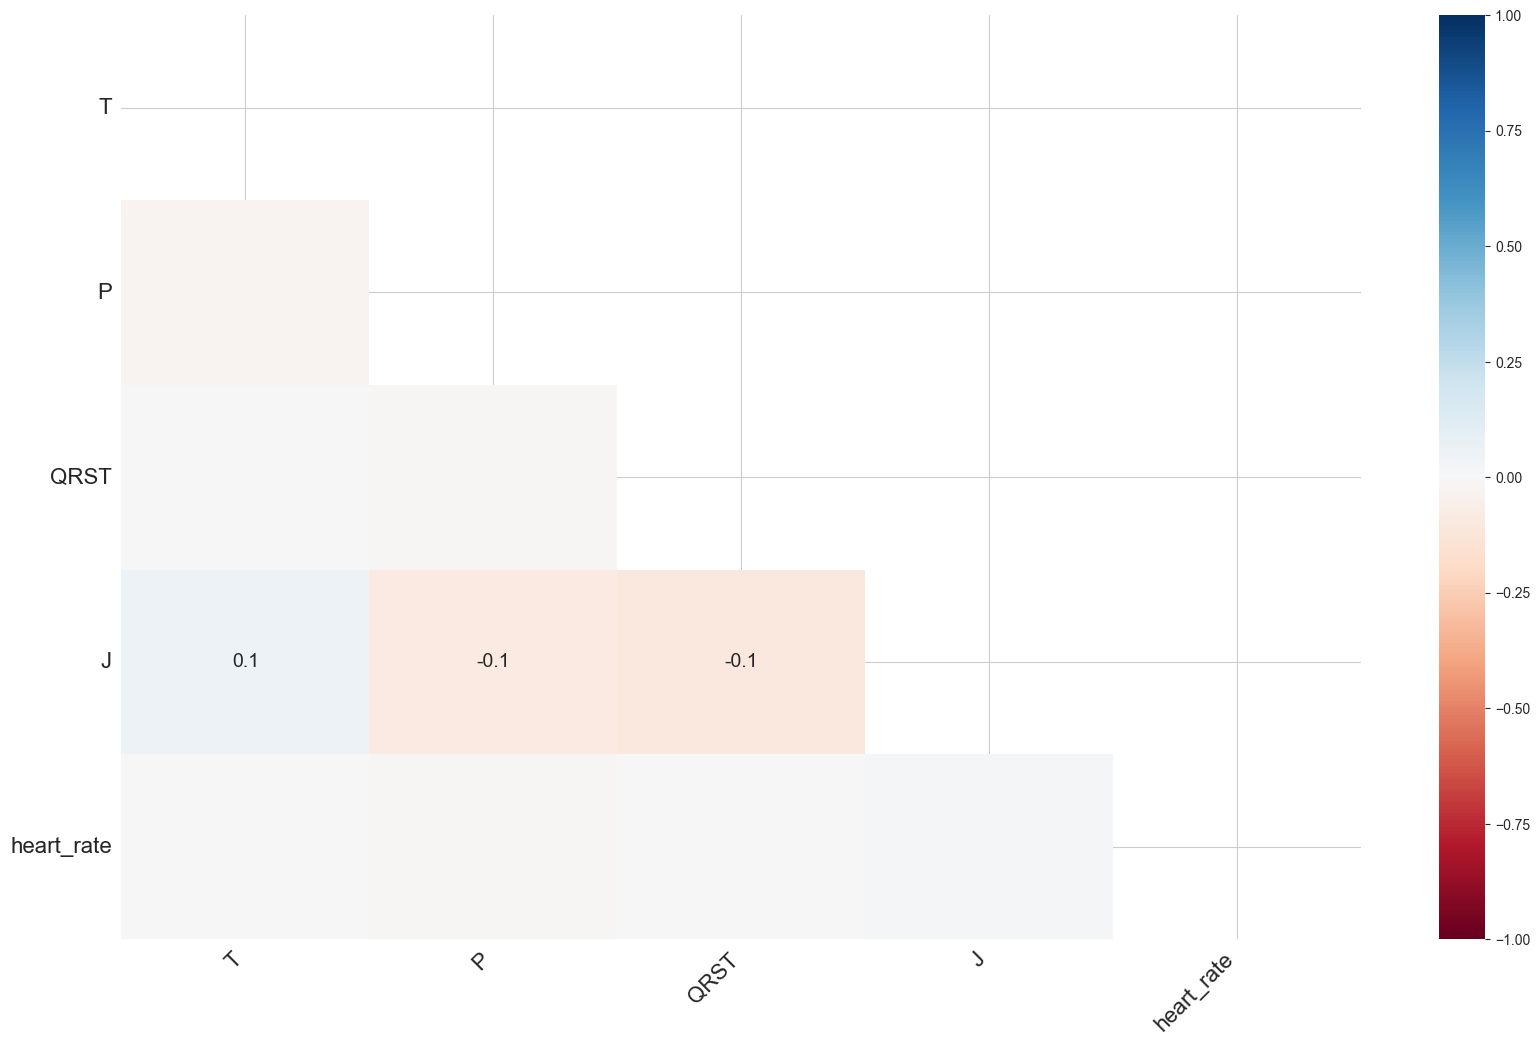

In [113]:
msno.heatmap(data_train)

In [114]:
# msno.bar(data_train.sample(10))

In [115]:
data_train.skew(), data_train.kurt()

(age             -0.286886
 sex             -0.205284
 height          13.723838
 weight           0.167132
 qrs_duration     2.565716
                   ...    
 LD              -0.289642
 LE              -0.647555
 LF               0.433284
 LG               0.299452
 diagnosis        1.487672
 Length: 280, dtype: float64,
 age              -0.203420
 sex              -1.966580
 height          208.988124
 weight            4.956509
 qrs_duration     11.075159
                    ...    
 LD                3.254648
 LE                2.174192
 LF                4.104493
 LG                1.537943
 diagnosis         1.078766
 Length: 280, dtype: float64)

C:\Users\IKHSAN PC\AppData\Local\Temp\ipykernel_2216\1893700277.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.johnsonsu)
C:\Users\IKHSAN PC\AppData\Local\Temp\ipykernel_2216\1893700277.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.norm)
C:\Us

<Axes: title={'center': 'Log normal'}, xlabel='qrs_duration'>

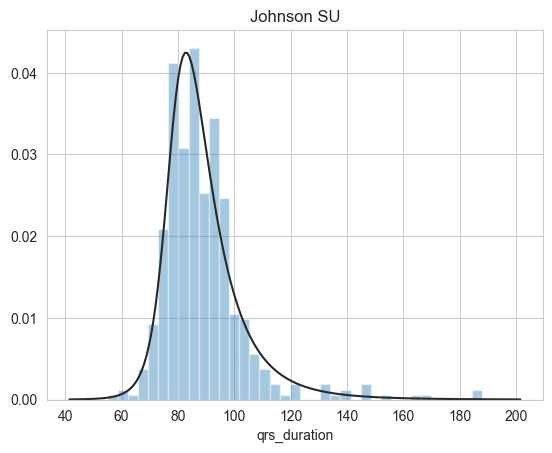

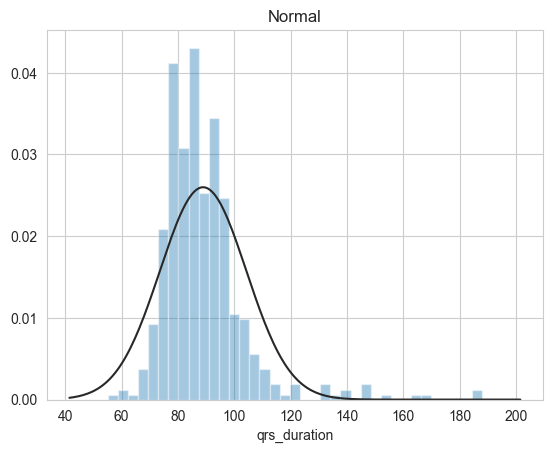

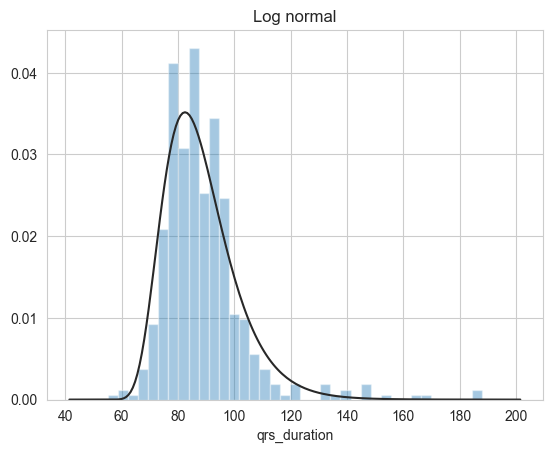

In [116]:
y = data_train['qrs_duration']
plt.figure(1);
plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2);
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3);
plt.title('Log normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [124]:
correlation = numeric_features.corr()
print(correlation['age'].sort_values(ascending=False), '\n')

age       1.000000
weight    0.381555
HR        0.315791
IE        0.296962
GF        0.290947
            ...   
GA             NaN
GH             NaN
IB             NaN
KP             NaN
LC             NaN
Name: age, Length: 280, dtype: float64 



<Axes: title={'center': 'Correlation of Numeric Feature with QR Duration'}>

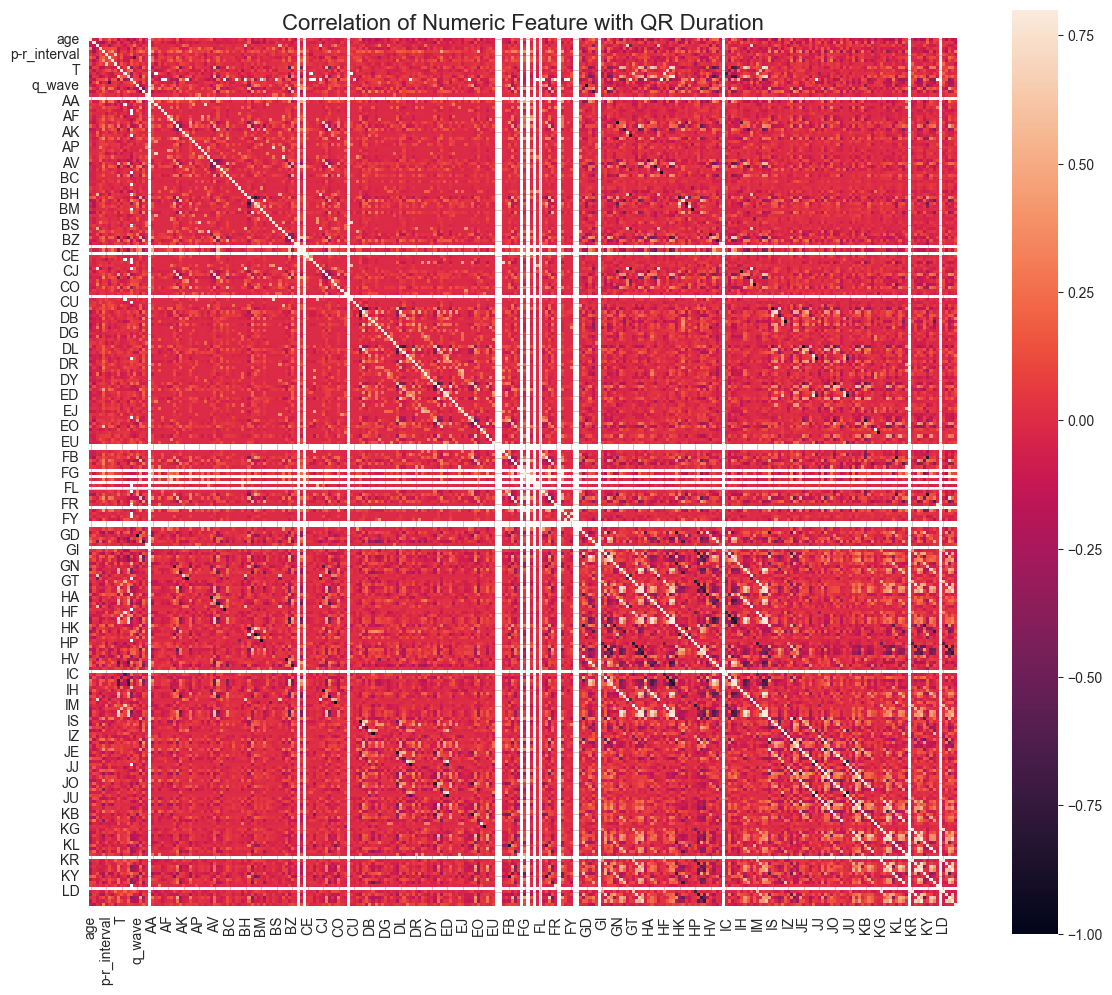

In [125]:
f, ax = plt.subplots(figsize=(14, 12))
plt.title("Correlation of Numeric Feature with QR Duration", y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8)